Dataset : https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import defaultdict

Baca dataset

In [3]:
animes = pd.read_csv('dataset/anime.csv')
ratings = pd.read_csv('dataset/rating.csv')

In [4]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Dapat dilihat bahwa terdapat 12294 judul anime pada dataset

In [6]:
print('banyak data : ', len(animes.anime_id.unique()))
print('jenis genre : ', animes.genre.unique())

banyak data :  12294
jenis genre :  ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']


In [7]:
print(animes.type.unique())

['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]


Cek nilai null

In [8]:
animes.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Hapus nilai null

In [9]:
animes.dropna(inplace=True)

In [10]:
animes.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Hitung banyak genre lalu dimasukkan ke dalam dictionary

In [11]:
all_genres = defaultdict(int)

for genres in animes['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

In [12]:
all_genres

defaultdict(int,
            {'Drama': 1977,
             'Romance': 1437,
             'School': 1176,
             'Supernatural': 1001,
             'Action': 2768,
             'Adventure': 2316,
             'Fantasy': 2242,
             'Magic': 747,
             'Military': 416,
             'Shounen': 1684,
             'Comedy': 4575,
             'Historical': 798,
             'Parody': 403,
             'Samurai': 146,
             'Sci-Fi': 2036,
             'Thriller': 86,
             'Sports': 533,
             'Super Power': 451,
             'Space': 377,
             'Slice of Life': 1204,
             'Mecha': 929,
             'Music': 842,
             'Mystery': 485,
             'Seinen': 532,
             'Martial Arts': 264,
             'Vampire': 100,
             'Shoujo': 594,
             'Horror': 362,
             'Police': 195,
             'Psychological': 226,
             'Demons': 287,
             'Ecchi': 628,
             'Josei': 52,
         

Pesebaran genre anime

In [13]:
from wordcloud import WordCloud

In [14]:
from collections import defaultdict

all_genres = defaultdict(int)

for genres in animes['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

In [15]:
def wordCloud(words):
    wordCloud = WordCloud(width=1000, height=800, background_color='white').generate_from_frequencies(words)

    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [16]:
wordCloud(all_genres)

ValueError: Only supported for TrueType fonts

In [30]:
# export dataframe
animes.to_csv('animes_preprocessed.csv', index=False)

# **Content Base Filltering**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
# Create the TfidfVectorizer object
tfidf = TfidfVectorizer()

# Fit and transform your data
tfidf_matrix = tfidf.fit_transform(animes['genre'])

# Access the underlying CountVectorizer and get the feature names
feature_names = tfidf.get_feature_names_out()

In [19]:
tfidf_matrix.shape

(12017, 47)

In [20]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29498527, 0.3162867 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.2516182 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Cek vektor

In [21]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=animes.name
).sample(22, axis=1).sample(10, axis=0)

,supernatural,mystery,shoujo,comedy,demons,thriller,mecha,sports,military,josei,...,power,arts,seinen,romance,parody,sci,life,police,of,game
name,,,,,,,,,,,,,,,,,,,,,
Negima!?,0.344297,0.0,0.000000,0.194221,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.308602,0.000000,0.00000,0.0,0.000000,0.0,0.0
Aki no Puzzle,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
Glass no Kamen Desu ga the Movie: Onna Spy no Koi! Murasaki no Bara wa Kiken na Kaori!?,0.000000,0.0,0.000000,0.408436,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.912787,0.00000,0.0,0.000000,0.0,0.0
Shin Chou Kyou Ryo: Condor Hero III,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.468280,0.000000,0.00000,0.0,0.000000,0.0,0.0
Silk Road Shounen Yuuto,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
Mechiku,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
Sasurai no Shoujo Nell,0.000000,0.0,0.652846,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0
Saraba Uchuu Senkan Yamato: Ai no Senshi-tachi,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.527852,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.33587,0.0,0.000000,0.0,0.0
Ginga Hyouryuu Vifam: Chicago Super Police 13,0.000000,0.0,0.000000,0.264022,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.590046,0.00000,0.0,0.687202,0.0,0.0


In [22]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [23]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=animes['name'], columns=animes['name'])

In [24]:
# export dataframe
cosine_sim_df.to_csv('tfidf_matrix.csv', index=False)

In [25]:
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

name,Animentary: Ketsudan,Azumanga Daioh,Shining Hearts: Shiawase no Pan,Brothers Conflict,Nouryou Anime: Denkyuu Ika Matsuri
name,,,,,
Yokohama Meibutsu: Otoko Katayama-gumi!,0.000000,0.315776,0.329765,0.000000,0.0
ef: A Tale of Memories. - Prologue,0.000000,0.000000,0.000000,0.000000,0.0
Getter Robo G,0.000000,0.000000,0.255799,0.000000,0.0
Me wo Samase Toragorou,0.000000,0.000000,0.000000,0.000000,0.0
The Epic Of ZektBach,0.000000,0.000000,0.722584,0.000000,0.0
Pale Cocoon,0.000000,0.000000,0.000000,0.000000,0.0
Channel 5.5 Prologue: Shin Bangumi Start!,0.000000,0.284965,0.000000,0.000000,0.0
Sacred Seven: Shirogane no Tsubasa Picture Drama,0.000000,0.252899,0.195662,0.000000,0.0
Kuroshitsuji,0.279540,0.065111,0.423384,0.000000,0.0


In [26]:
cosine_sim_df

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Silent Chaser Kagami,Super Erotic Anime,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.000000,0.147153,0.000000,0.000000,0.000000,0.426050,0.000000,0.156140,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fullmetal Alchemist: Brotherhood,0.147153,1.000000,0.178778,0.000000,0.178778,0.282882,0.339213,0.407534,0.178778,0.178778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gintama°,0.000000,0.178778,1.000000,0.220855,1.000000,0.182588,0.195860,0.199140,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Steins;Gate,0.000000,0.000000,0.220855,1.000000,0.220855,0.000000,0.000000,0.274732,0.220855,0.220855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gintama&#039;,0.000000,0.178778,1.000000,0.220855,1.000000,0.182588,0.195860,0.199140,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Under World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Violence Gekiga David no Hoshi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [27]:
def anime_recommendation(nama_anime, similarity_data=cosine_sim_df, items=animes[['name', 'genre']], k=5):
  index = similarity_data.loc[:, nama_anime].to_numpy().argpartition(
      range(-1, -k, -1)
  )

  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(nama_anime, errors='ignore')
  df = pd.DataFrame(closest).merge(items).head(k)
  return df

Hasil rekomendasi

In [46]:
def anime_recommendation2(nama_anime, similarity_data=cosine_sim_df, items=animes[['name', 'genre']], k=5):
  index = similarity_data.loc[:, nama_anime].to_numpy().argpartition(
      range(-1, -k, -1)
  )

  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(nama_anime, errors='ignore')
  
  return closest.to_list()

In [28]:
animes[animes['name'] == "Sword Art Online"]

,anime_id,name,genre,type,episodes,rating,members
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100


In [29]:
anime_recommendation('Sword Art Online', k=5)

,name,genre
0,Sword Art Online II,"Action, Adventure, Fantasy, Game, Romance"
1,Sword Art Online: Extra Edition,"Action, Adventure, Fantasy, Game, Romance"
2,Sword Art Online II: Debriefing,"Action, Adventure, Fantasy, Game"
3,Bakugan Battle Brawlers,"Action, Fantasy, Game"
4,Monster Strike: Mermaid Rhapsody,"Action, Fantasy, Game"


In [47]:
test = anime_recommendation2('Sword Art Online', k=5)

In [48]:
test

['Sword Art Online II',
 'Sword Art Online: Extra Edition',
 'Sword Art Online II: Debriefing',
 'Bakugan Battle Brawlers',
 'Monster Strike: Mermaid Rhapsody']

Evaluasi model menggunakan Jaccard Similarity

In [37]:
def jaccard_set(list_genre, list_genre_prediksi):
    intersection = len(list(set(list_genre).intersection(list_genre_prediksi)))
    union = (len(list_genre) + len(list_genre_prediksi)) - intersection
    return float(intersection) / union

In [38]:
genre_anime  = animes[animes.name.eq('Sword Art Online')]['genre'].values.tolist()

In [39]:
def to_list(list):
  for i in list:
    return i.split(',')

In [40]:
genre_anime = to_list(genre_anime)

In [41]:
all_genre_prediksi = anime_recommendation('Sword Art Online')['genre'].values

In [42]:
def jaccard_value_total(genre_anime, genre_prediksi):
  total_jaccard_value = 0
  result = 0
  for i in range(len(genre_prediksi)):
    genre = genre_prediksi[i].split(',')
    jaccard_value = jaccard_set(genre_anime, genre)
    total_jaccard_value += jaccard_value
    result = total_jaccard_value / len(genre_prediksi)
  return result

In [43]:
jaccard_value_total(genre_anime, all_genre_prediksi)

0.8

Dapat dilihat, jaccard score menunjukkan 0.8, yang artinya rekomendasi yang diberikan berdasarkan genre cukup baik.

# **Collaborative Filltering**

Cek data rating

In [44]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Hilangkan nilai -1, karena nilai tersebut nilai null/orang yang belum/tidak memberikan rating.
Dengan menggunakan operator bitwise

In [45]:
mask = (ratings['rating'] == -1)

In [46]:
ratings = ratings.loc[~mask]

In [47]:
ratings[ratings['rating'] == -1].sum()

user_id     0.0
anime_id    0.0
rating      0.0
dtype: float64

ambil 1000 data rating

In [48]:
ratings = ratings[ratings['user_id'] < 1000]

encoding rating user_id

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder_rating = LabelEncoder()

In [50]:
ratings['user_id'] = encoder_rating.fit_transform(ratings['user_id'])

encoding anime_id

In [51]:
encoder_anime = LabelEncoder()

In [52]:
ratings['anime_id'] = encoder_anime.fit_transform(ratings['anime_id'])

ambil nilai unique

In [53]:
userid_unique = ratings['user_id'].nunique()
anime_unique = ratings['anime_id'].nunique()

In [54]:
print("user unique : ", userid_unique)
print("anime unique : ", anime_unique)

user unique :  940
anime unique :  4510


import library

In [55]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Reshape, Flatten, concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [56]:
X = ratings.drop(['rating'], axis=1)

In [57]:
y = ratings['rating'].astype(float)

Bagi data

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=22)

buat callback

In [59]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoc_end(self, epoch, logs={}):
    if(logs.get('mean_squared_error') <= 0.6):
      print("\nMean squared error telah mencapai 0.6. Stop training!")
      self.model.stop_training = True
my_callbacks = myCallback()

Model

In [60]:
def RecommenderAnime(n_users, n_movies, n_dim):

    # User
    user = Input(shape=(1,))
    U = Embedding(n_users, n_dim)(user)
    U = Dropout(0.2)(U)
    U = Flatten()(U)

    # Anime
    movie = Input(shape=(1,))
    M = Embedding(n_movies, n_dim)(movie)
    M = Dropout(0.2)(M)
    M = Flatten()(M)

    # Gabungkan disini
    merged_vector = concatenate([U, M])
    dense_1 = Dense(128, activation='relu')(merged_vector)
    dropout = Dropout(0.3)(dense_1)
    final = Dense(1)(dropout)

    model = Model(inputs=[user, movie], outputs=final)

    model.compile(optimizer=Adam(0.001),
                  loss='mean_squared_error',
                  metrics=['mse'])

    return model

In [61]:
model = RecommenderAnime(userid_unique, anime_unique, 100)

In [62]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       94000       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       451000      ['input_2[0][0]']                
                                                                                              

Traning model

In [64]:
history = model.fit(x=[X_train['user_id'], X_train['anime_id']],
                    y=y_train,
                    batch_size=8,
                    epochs=30,
                    verbose=1,
                    validation_data=([X_val['user_id'], X_val['anime_id']], y_val),
                    callbacks=[my_callbacks]
                    )

Epoch 1/30
7787/7787 [==============================] - 56s 7ms/step - loss: 1.9563 - mse: 1.9563 - val_loss: 1.5984 - val_mse: 1.5984
Epoch 2/30
7787/7787 [==============================] - 40s 5ms/step - loss: 1.7484 - mse: 1.7484 - val_loss: 1.4980 - val_mse: 1.4980
Epoch 3/30
7787/7787 [==============================] - 44s 6ms/step - loss: 1.6316 - mse: 1.6316 - val_loss: 1.5409 - val_mse: 1.5409
Epoch 4/30
7787/7787 [==============================] - 39s 5ms/step - loss: 1.5383 - mse: 1.5383 - val_loss: 1.4684 - val_mse: 1.4684
Epoch 5/30
7787/7787 [==============================] - 39s 5ms/step - loss: 1.4779 - mse: 1.4779 - val_loss: 1.4463 - val_mse: 1.4463
Epoch 6/30
7787/7787 [==============================] - 38s 5ms/step - loss: 1.4116 - mse: 1.4116 - val_loss: 1.4460 - val_mse: 1.4460
Epoch 7/30
7787/7787 [==============================] - 39s 5ms/step - loss: 1.3659 - mse: 1.3659 - val_loss: 1.4399 - val_mse: 1.4399
Epoch 8/30
7787/7787 [==============================] -

plot loss model

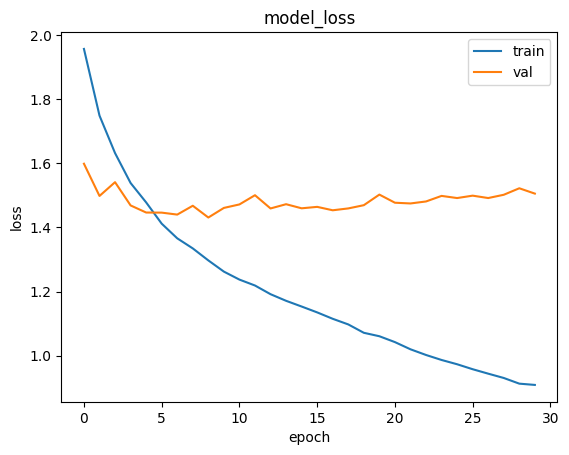

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

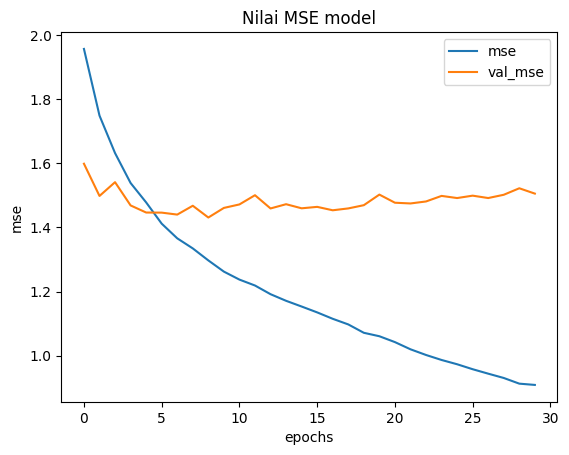

In [66]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Nilai MSE model')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(['mse', 'val_mse'], loc='upper right')
plt.show()

simpan model

In [67]:
model.save('animrec.h5')

buat fungsi prediksi

In [68]:
def buat_prediksi(user_id, anime_id, model):
    return model.predict([np.array([user_id]), np.array([anime_id])])[0][0].round(2)

In [69]:
def prediksi_teratas(user_id, model, k):
  """
  Parameter user_id : input user ke n dari data set
  Parameter model : input model yang telah di traning
  Parameter k : input berapa banyak prediksi yang akan tampilkan
  """


  user_id = int(user_id) - 1    # ambil user id
  user_ratings = ratings[ratings['user_id'] == user_id] # lihat anime apa saja yg telah di review oleh pengguna
  anime_id_user_ratings = user_ratings.anime_id.values.tolist() # buatlist anime yang telah ditonton oleh pengguna
  anime_viewed = animes.loc[animes['anime_id'].isin(anime_id_user_ratings)].sort_values(by='anime_id')  # cari anime berdasarkan anime_id

  genre_viewed = defaultdict(int)  # buat dictionary

  for genres in anime_viewed['genre']:  # hitung genre yang muncul
    for genre in genres.split(','):
        genre_viewed[genre.strip()] += 1

  genre_viewed_by_user = list(sorted(genre_viewed, key=genre_viewed.get, reverse=True)) # urutkan genre yang muncul dari yang paling banyak
  top7_genre_by_user = genre_viewed_by_user[:7]  # ambil 7 genre tertinggi

  print("7 genre yang banyak ditonton oleh pengguna : \n")
  print(top7_genre_by_user, sep=", ")
  print("=======================" * 5)

  rekomendasi = ratings[~ratings['anime_id'].isin(user_ratings['anime_id'])][['anime_id']].drop_duplicates() # hilangkan anime yg telah di review dan masukkan ke dataframe rekomendasi
  rekomendasi['rating_predict'] = rekomendasi.apply(lambda x: buat_prediksi(user_id, x['anime_id'], model), axis=1) # prediksi semua baris data anime. yg hasilnya dimasukkan ke dataframe rekomendasi
  rekomendasi_fix = rekomendasi.sort_values(by='rating_predict', ascending=False).merge(animes[['anime_id', 'name', 'type', 'members', 'genre']],
                                                                                       on='anime_id').head(k) # urutkan dari rating 5 tertinggi
  return rekomendasi_fix.sort_values('rating_predict', ascending=False)[['name', 'type', 'rating_predict', 'genre']]


hasil prediksi

In [70]:
prediksi_teratas(200, model, 5)

7 genre yang banyak ditonton oleh pengguna : 

['Comedy', 'Adventure', 'Sci-Fi', 'Action', 'Fantasy', 'Shounen', 'Drama']
1/1 [==============================] - 0s 33ms/step


,name,type,rating_predict,genre
0,Yami no Matsuei,TV,10.01,"Comedy, Drama, Fantasy, Horror, Magic, Shoujo,..."
1,Legendz: Yomigaeru Ryuuou Densetsu,TV,10.00,"Action, Adventure, Comedy, Fantasy"
2,Aria The Animation,TV,9.90,"Fantasy, Sci-Fi, Shounen, Slice of Life"
3,TO-Y,OVA,9.89,"Drama, Music, Shounen"
4,Hakugei Densetsu,TV,9.87,"Adventure, Sci-Fi"


In [71]:
prediksi_teratas(34, model, 5)

7 genre yang banyak ditonton oleh pengguna : 

['Action', 'Comedy', 'Adventure', 'Sci-Fi', 'Fantasy', 'Shounen', 'Romance']
1/1 [==============================] - 0s 27ms/step


,name,type,rating_predict,genre
0,Yami no Matsuei,TV,10.06,"Comedy, Drama, Fantasy, Horror, Magic, Shoujo,..."
1,Ganbarist! Shun,TV,9.97,"Comedy, Shounen, Sports"
2,Hakugei Densetsu,TV,9.92,"Adventure, Sci-Fi"
3,Bannou Bunka Neko-Musume,OVA,9.90,"Adventure, Comedy, Mecha, Sci-Fi, Seinen"
4,Baoh Raihousha,OVA,9.87,"Action, Martial Arts, Sci-Fi, Shounen, Space, ..."


In [72]:
prediksi_teratas(45, model, 5)

7 genre yang banyak ditonton oleh pengguna : 

['Comedy', 'Adventure', 'Fantasy', 'Action', 'Shounen', 'Sci-Fi', 'Drama']
1/1 [==============================] - 0s 30ms/step


,name,type,rating_predict,genre
0,Tattoon Master,OVA,10.05,"Adventure, Comedy, Slice of Life, Supernatural"
1,Claymore,TV,9.87,"Action, Adventure, Demons, Fantasy, Shounen, S..."
2,Kaiketsu Zorro,TV,9.83,"Adventure, Historical, Shounen"
3,Mahoromatic 2,TV,9.80,"Comedy, Drama, Ecchi, Military, Romance, Sci-Fi"
4,Dorei Kaigo,OVA,9.77,Hentai
